Import Pandas

In [30]:
import pandas as pd 

In [31]:
df = pd.read_excel('Data.xlsx')
df.head()

,tanggal,komoditi,satuan,harga,bulan
0,2020-01-02,1,Kg,13375,Januari
1,2020-01-03,1,Kg,10700,Januari
2,2020-01-06,1,Kg,10950,Januari
3,2020-01-07,1,Kg,10950,Januari
4,2020-01-08,1,Kg,11040,Januari


In [32]:
df.drop(columns=['tanggal','satuan'])

,komoditi,harga,bulan
0,1,13375,Januari
1,1,10700,Januari
2,1,10950,Januari
3,1,10950,Januari
4,1,11040,Januari
...,...,...,...
1585,38,5400,Februari
1586,38,5900,Februari
1587,38,5900,Februari
1588,38,6000,Februari


Visualisasi Data

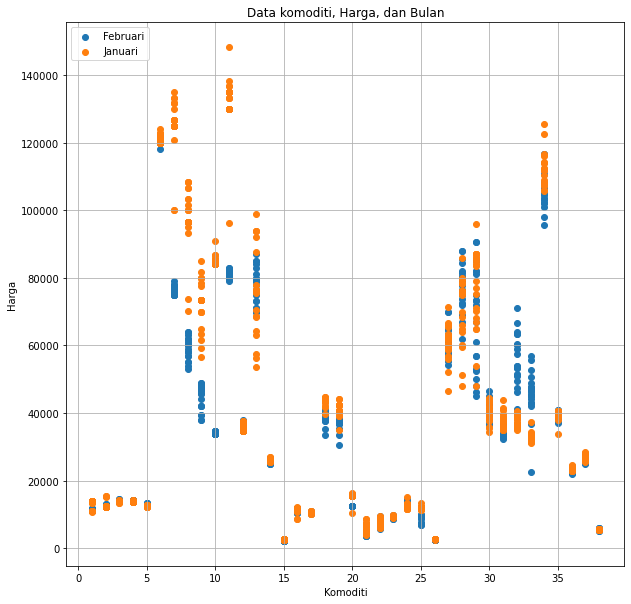

In [33]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10,10))
for bulan, d in df.groupby('bulan'):
    ax.scatter(d['komoditi'], d['harga'], label=bulan)

plt.legend(loc='upper left')
plt.title('Data komoditi, Harga, dan Bulan')
plt.xlabel('Komoditi')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

Preprocessing Dataset

In [34]:
import numpy as np 

x_train = np.array(df[['komoditi', 'harga']])
y_train = np.array(df['bulan'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[    1 13375]
 [    1 10700]
 [    1 10950]
 ...
 [   38  5900]
 [   38  6000]
 [   38  5800]]

y_train: ['Januari' 'Januari' 'Januari' ... 'Februari' 'Februari' 'Februari']


Label Binanrizer

In [35]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [36]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')


y_train: [1 1 1 ... 0 0 0]


Training KNN Classification Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Prediksi Satuan

In [38]:
komoditi = 12
harga = 4700
x_new = np.array([komoditi, harga]).reshape(1, -1)
x_new

array([[  12, 4700]])

In [39]:
y_new = model.predict(x_new)
y_new

array([0])

In [40]:
lb.inverse_transform(y_new)

array(['Februari'], dtype='<U8')

Visualisasi Nearest Neighbours

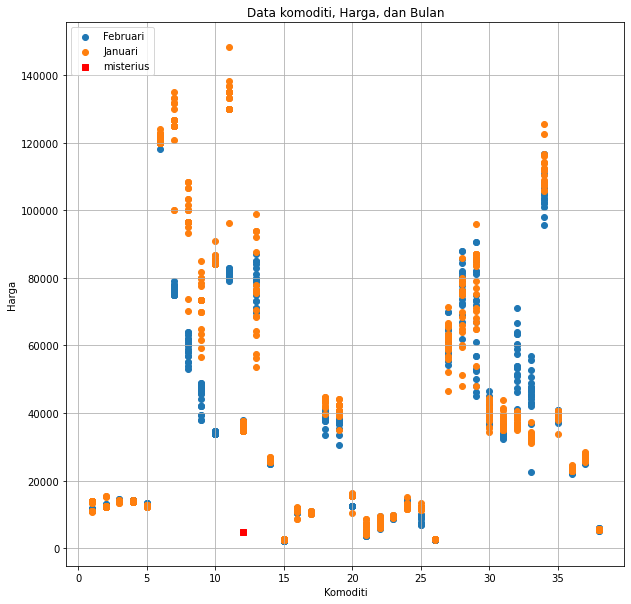

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
for bulan, d in df.groupby('bulan'):
    ax.scatter(d['komoditi'], d['harga'], label=bulan)

plt.scatter(komoditi, harga, marker='s', color='red', label='misterius')

plt.legend(loc='upper left')
plt.title('Data komoditi, Harga, dan Bulan')
plt.xlabel('Komoditi')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

Kalkulasi Distance (Euclidean Distance)

In [42]:
misterius = np.array([komoditi, harga])
misterius

array([  12, 4700])

In [43]:
x_train

array([[    1, 13375],
       [    1, 10700],
       [    1, 10950],
       ...,
       [   38,  5900],
       [   38,  6000],
       [   38,  5800]], dtype=int64)

In [44]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[8675.006974060598,
 6000.010083324861,
 6250.009679992504,
 6250.009679992504,
 6340.009542579569,
 6340.009542579569,
 9238.006549034266,
 9175.00659400308,
 8925.00677870891,
 9050.006685080403,
 9300.00650537407,
 8800.006874997314,
 9238.006549034266,
 9175.00659400308,
 8925.00677870891,
 9175.00659400308,
 9175.00659400308,
 9175.00659400308,
 9175.00659400308,
 9175.00659400308,
 9175.00659400308,
 9175.00659400308,
 10425.004796161966,
 7400.006756753672,
 7350.00680271794,
 7350.00680271794,
 7500.006666663704,
 7500.006666663704,
 7700.006493503755,
 7500.006666663704,
 10613.004711202195,
 7925.006309145753,
 10800.004629628638,
 7500.006666663704,
 7600.006578944521,
 7600.006578944521,
 7500.006666663704,
 7900.006329111388,
 7800.006410253776,
 7800.006410253776,
 7800.006410253776,
 7800.006410253776,
 7800.006410253776,
 7800.006410253776,
 8850.004576270003,
 8900.004550560634,
 8700.004655171168,
 8850.004576270003,
 9100.004450548362,
 9000.004499998875,
 9000.00449

In [45]:
df['jarak'] = data_jarak
df.sort_values(['jarak'])

,tanggal,komoditi,satuan,harga,bulan,jarak
1240,2020-02-17,21,250 gr,4800,Februari,100.404183
1246,2020-02-25,21,250 gr,4800,Februari,100.404183
1231,2020-02-04,21,250 gr,4390,Februari,310.130618
440,2020-01-10,21,250 gr,4390,Januari,310.130618
446,2020-01-20,21,250 gr,4390,Januari,310.130618
...,...,...,...,...,...,...
135,2020-01-07,7,Kg,135000,Januari,130300.000096
222,2020-01-14,11,Kg,136667,Januari,131967.000004
216,2020-01-06,11,Kg,136667,Januari,131967.000004
217,2020-01-07,11,Kg,138333,Januari,133633.000004


Testing Set

In [46]:
x_tets = np.array([[21, 4800], [21, 4800], [21, 4390],[21, 4390]])
y_test = lb.transform(np.array(['Februari', 'Februari', 'Februari', 'Januari'])).flatten()

print(f'x_test:\n{x_tets}')
print(f'y_test:\n{y_test}')

x_test:
[[  21 4800]
 [  21 4800]
 [  21 4390]
 [  21 4390]]
y_test:
[0 0 0 1]


Prediksi terhadap testing set

In [47]:
y_pred = model.predict(x_tets)
y_pred

array([0, 0, 1, 1])

Accuracy

In [48]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accracy: {acc}')

Accracy: 0.75


Precission

In [49]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precission: {prec}')

Precission: 0.5


Recall

In [50]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 1.0


F1 Score

In [51]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1score: {f1}')

F1score: 0.6666666666666666


Classification Report

In [52]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



Matthews Correlation Cefficient(MCC)

In [53]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.5773502691896258
